In [2]:
# from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
# import tensorflow as tf
# from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 

# print(tf.__version__)

2.1.0


Задания 1 и 2 

In [74]:
def probability(range_: range, p: float, k=5) -> float:
    factorial_ = [(math.factorial(k)/(math.factorial(k-i) * math.factorial(i)))*p**i*(1-p)**(k-i) for i in range_]
    return factorial_

In [75]:
n = 5
prob = probability(range(n+1), 0.25)
probability(range(n+1), 0.25)

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

In [67]:
np.sum(prob)

1.0

Вроде сходится раз в сумме единица. 

Мат ожидание соответственно n*p = 5*0,25 = 1,25 

Дисперсия n*p*(1-p) = 0,9375

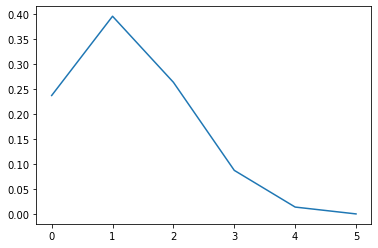

In [69]:
plt.plot(prob)

Задание 3

Всё просто подставляем в формулу последовательным перебором целого числа писем пока не приблизимся к нужной вероятности. 

In [81]:
def poison_dest(lambda_, k):
    some_dest = lambda_**k*np.exp(-lambda_)/math.factorial(k)
    return some_dest

In [157]:
dest_list = [poison_dest(10, i) for i in range(25)]
counter = 0
while np.sum(dest_list[:counter]) <=0.95: 
    counter +=1 
else: 
    print(counter, np.sum(dest_list[:counter]))

16 0.9512595966960213


In [163]:
n = 16
dest_list = [poison_dest(10, i) for i in range(n)]
np.sum(dest_list)

0.9512595966960213

Ответ 15 писем.

В задании надо было сформулировать вопрос как "с вероятностью не менее 95%".

Строго говоря у нас нет такого целого N чтобы совпадало с вероятностью ровно 95%. 

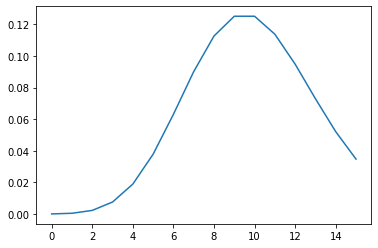

In [164]:
plt.plot(dest_list)

Задание 4 

Аналогично предыдущему заданию используем последовательный перебор общего количества выстрелов. 
Оцениваем точность по суммарной вероятности промахов в серии выстрелов. 
Количество попаданий 6 константа. 

In [391]:
def probability(k, n: int = 6, p: float = 0.01) -> float:
    factorial_ = (math.factorial(k)/(math.factorial(k-n) * math.factorial(n)))*p**n*(1-p)**(k-n)
    return factorial_

In [392]:
def probability(k, n: int = 6, p: float = 0.01) -> float:
    missed = k-n    
    factorial_ = np.sum([(math.factorial(k)/(math.factorial(k-i) * math.factorial(i)))*(1-p)**i*p**(k-i) for i in range(missed+1)])
    return factorial_

In [393]:
k = 6+1
while probability(k) <=0.9:
    k += 1
print(k, probability(k))

926 0.9003627121531275


Требуется произвести 926 выстрелов 

In [372]:
probability(700)

0.7005756236204581

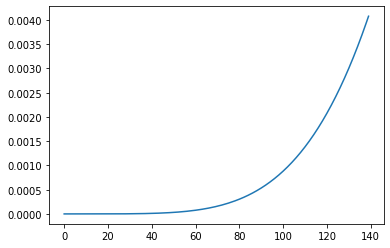

In [390]:
p: float = 0.01
plt.plot([np.sum([(math.factorial(k)/(math.factorial(k-i) * math.factorial(i)))*(1-p)**i*p**(k-i) for i in range(k-6+1)]) for k in range(10, 150)])

In [396]:
counter = n+1
work = True
# while work:
dict_ = {} 
for i in range(counter, 200):
    dict_[i] = probability(counter)
    counter += 1
# print(dict_, max(dict_, key=dict_.get))
    
       

599